In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns

In [2]:
from mpl_toolkits.axes_grid1 import host_subplot

In [3]:
path11 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 NobelpapersCD.zip'
path12 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 Nobelpapers.zip'
path21 = r'E:\netData\MAGzip\MAG Nobel\2 NobelpaperControls\20954 NobelpapercontrolsCD.zip'
path22 = r'E:\netData\MAGzip\MAG Nobel\2 NobelpaperControls\20954 Nobelpapercontrols.zip'

In [4]:
fNobel1 = pd.read_csv(path11)
fControl1 = pd.read_csv(path21)
fNobel2 = pd.read_csv(path12)
fControl2 = pd.read_csv(path22)

In [5]:
fNobel = pd.concat([fNobel1 , fNobel2] , axis = 1)
fControl = pd.concat([fControl1 , fControl2] , axis = 1)

fNobel = fNobel.loc[:, ~fNobel.columns.duplicated()]
fControl = fControl.loc[:, ~fControl.columns.duplicated()]

fNobel.fillna(0 , inplace=True)
fControl.fillna(0 , inplace=True)

In [6]:
fControl['If Prize'] = 0
fNobel['If Prize'] = 1

fNobel1 = fNobel[fNobel['Field']=='Physics']
fNobel2 = fNobel[fNobel['Field']=='Chemistry']
fNobel3 = fNobel[fNobel['Field']=='Medicine']

fControl1 = fControl[fControl['Field']=='Physics']
fControl2 = fControl[fControl['Field']=='Chemistry']
fControl3 = fControl[fControl['Field']=='Medicine']

In [7]:
df1 = pd.concat([fNobel1 , fControl1])
df2 = pd.concat([fNobel2 , fControl2])
df3 = pd.concat([fNobel3 , fControl3])

df1.index = range(len(df1))
df2.index = range(len(df2))
df3.index = range(len(df3))

In [8]:
df1 = df1.sort_values('ni')
df1.index = range(len(df1))
split_index = len(df1) // 2
df1['type'] = 0
df1.loc[split_index:, 'type'] = 1

df2 = df2.sort_values('ni')
df2.index = range(len(df2))
split_index = len(df2) // 2
df2['type'] = 0
df2.loc[split_index:, 'type'] = 1

df3 = df3.sort_values('ni')
df3.index = range(len(df3))
split_index = len(df3) // 2
df3['type'] = 0
df3.loc[split_index:, 'type'] = 1

In [12]:
def mapteam(x):
    if x < 9:
        return x
    else:
        return 9
df1['team size'] = df1['AUnum'].apply(mapteam)
df2['team size'] = df2['AUnum'].apply(mapteam)
df3['team size'] = df3['AUnum'].apply(mapteam)

# Draw

In [13]:
x = range(1,10)
y1 = df1['CD'].groupby(df1['team size']).mean().reset_index()['CD'].values
std1 = df1['CD'].groupby(df1['team size']).std().reset_index()['CD'].values

y2 = df1['CD'].groupby(df2['team size']).mean().reset_index()['CD'].values
std2 = df1['CD'].groupby(df2['team size']).std().reset_index()['CD'].values

y3 = df1['CD'].groupby(df3['team size']).mean().reset_index()['CD'].values
std3 = df1['CD'].groupby(df3['team size']).std().reset_index()['CD'].values

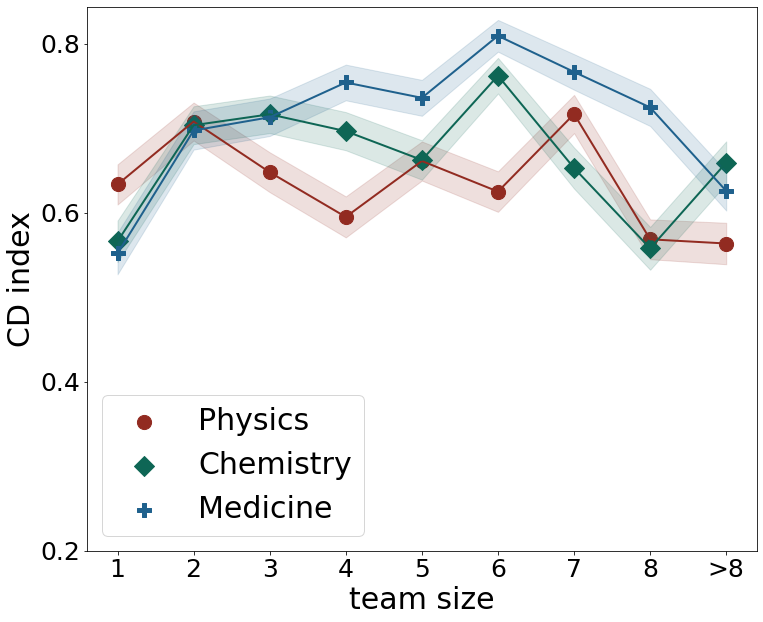

In [19]:
f, ax = plt.subplots(figsize=(12, 10))

for i in range(3):
    y = [y1 , y2, y3][i]
    std = [std1 , std2 , std3][i]
    marker = ['o','D','P'][i]
    c = ['#922B21','#0E6655','#1F618D'][i]
    label = ['Physics' , 'Chemistry' , 'Medicine'][i]
    plt.plot(x, y, color=c, linewidth=2)
    plt.scatter(x, y, s=200,marker=marker,c=c , label = label)
    plt.fill_between(x, y - std/20,y+std/20,color=c,alpha=0.15)
#     plt.errorbar(x, y, yerr=std/10, fmt='-', color=c, capsize=5, alpha=0.6)


plt.yticks([0.2,0.4,0.6,0.8],fontsize=25,)
plt.xticks(x,[1,2,3,4,5,6,7,8,'>8'],fontsize=25,)
plt.legend(fontsize = 30)
plt.xlabel('team size',fontsize = 30)
plt.ylabel('CD index',fontsize = 30)
plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 7\a1.pdf",bbox_inches = 'tight')

In [16]:
x = range(1,10)
y11 = df1['ni'].groupby(df1['team size']).mean().reset_index()['ni'].values
std11 = df1['ni'].groupby(df1['team size']).std().reset_index()['ni'].values

y21 = df1['ni'].groupby(df2['team size']).mean().reset_index()['ni'].values
std21 = df1['ni'].groupby(df2['team size']).std().reset_index()['ni'].values

y31 = df1['ni'].groupby(df3['team size']).mean().reset_index()['ni'].values
std31 = df1['ni'].groupby(df3['team size']).std().reset_index()['ni'].values

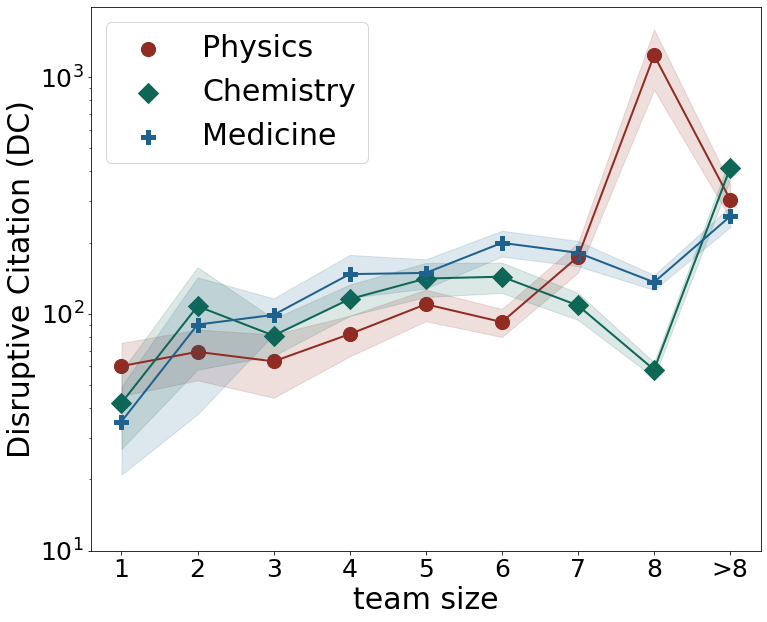

In [20]:
f, ax = plt.subplots(figsize=(12, 10))

for i in range(3):
    y = [y11 , y21, y31][i]
    std = [std11 , std21 , std31][i]
    marker = ['o','D','P'][i]
    c = ['#922B21','#0E6655','#1F618D'][i]
    label = ['Physics' , 'Chemistry' , 'Medicine'][i]
    plt.plot(x, y, color=c, linewidth=2)
    plt.scatter(x, y, s=200,marker=marker,c=c,label = label)
    plt.fill_between(x, y - std/20,y+std/20,color=c,alpha=0.15)
#     plt.errorbar(x, y, yerr=std/10, fmt='-', color=c, capsize=5, alpha=0.6)

ax.set_yscale("log")
plt.yticks([10e0,10e1,10e2],fontsize=25,)
plt.xticks(x,[1,2,3,4,5,6,7,8,'>8'],fontsize=25,)
plt.legend(fontsize = 30)
plt.xlabel('team size',fontsize = 30)
plt.ylabel('Disruptive Citation (DC)',fontsize = 30)
plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 7\a2.pdf",bbox_inches = 'tight')

# continue draw

In [21]:
x_pos = [1,2,3,5,6,7,]

d1 = df1.loc[df1['type']==1 , 'AUnum']
d2 = df2.loc[df2['type']==1 , 'AUnum']
d3 = df3.loc[df3['type']==1 , 'AUnum']
d5 = df1.loc[df1['type']==0 , 'AUnum']
d6 = df2.loc[df2['type']==0 , 'AUnum']
d7 = df3.loc[df3['type']==0 , 'AUnum']
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]
colors = ["#154360","#1A5276","#1F618D","#6E2C00","#873600","#A04000"]

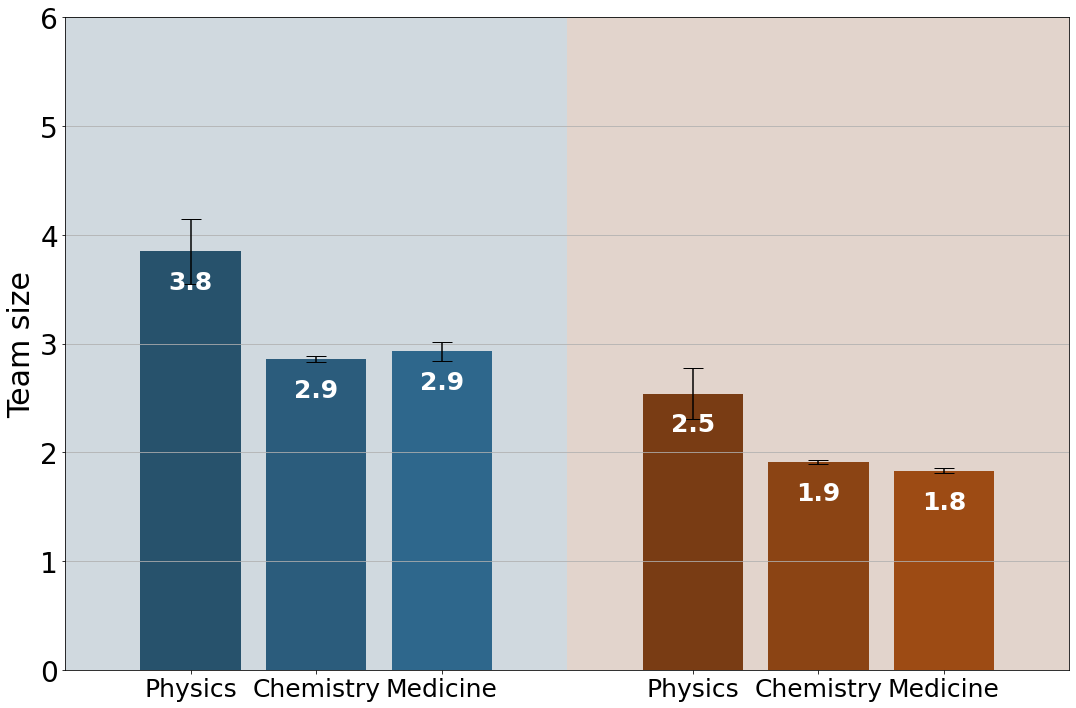

In [22]:
f, ax = plt.subplots(figsize=(18, 12))

plt.bar(x_pos, d, yerr=std,align='center', color= colors,alpha=0.9,capsize=10)
ax.yaxis.grid(True)
plt.xticks(x_pos,['Physics','Chemistry','Medicine','Physics','Chemistry','Medicine'],fontsize = 25)
plt.yticks([0,1,2,3,4,5,6],size = 28)
plt.ylabel(r'Team size',fontsize = 30)
plt.xlim(0,8)
for _ in range(len(d)):
    plt.text(x_pos[_],d[_]-0.35 , str(np.round(d[_] , 1)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    
ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)

plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 7\3.pdf",bbox_inches = 'tight')

In [23]:
print(scipy.stats.mannwhitneyu(d1 , d5, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d2 , d6, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d3 , d7, alternative='two-sided'))

MannwhitneyuResult(statistic=5635385.0, pvalue=9.667060399958955e-67)
MannwhitneyuResult(statistic=14524377.0, pvalue=3.1370199110979697e-224)
MannwhitneyuResult(statistic=7189337.5, pvalue=1.7853893529134347e-178)


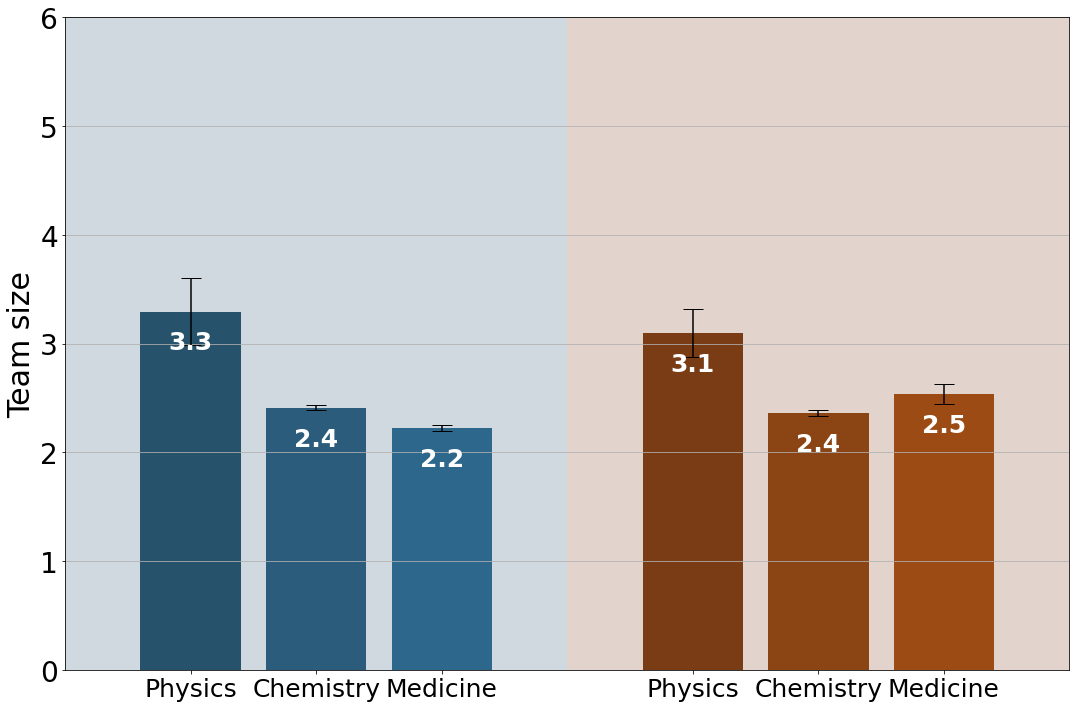

In [24]:
df1 = df1.sort_values('CD')
df1.index = range(len(df1))
split_index = len(df1) // 2
df1['type'] = 0
df1.loc[split_index:, 'type'] = 1

df2 = df2.sort_values('CD')
df2.index = range(len(df2))
split_index = len(df2) // 2
df2['type'] = 0
df2.loc[split_index:, 'type'] = 1

df3 = df3.sort_values('CD')
df3.index = range(len(df3))
split_index = len(df3) // 2
df3['type'] = 0
df3.loc[split_index:, 'type'] = 1

x_pos = [1,2,3,5,6,7,]

d1 = df1.loc[df1['type']==1 , 'AUnum']
d2 = df2.loc[df2['type']==1 , 'AUnum']
d3 = df3.loc[df3['type']==1 , 'AUnum']
d5 = df1.loc[df1['type']==0 , 'AUnum']
d6 = df2.loc[df2['type']==0 , 'AUnum']
d7 = df3.loc[df3['type']==0 , 'AUnum']
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]
colors = ["#154360","#1A5276","#1F618D","#6E2C00","#873600","#A04000"]

f, ax = plt.subplots(figsize=(18, 12))

plt.bar(x_pos, d, yerr=std,align='center', color= colors,alpha=0.9,capsize=10)
ax.yaxis.grid(True)
plt.xticks(x_pos,['Physics','Chemistry','Medicine','Physics','Chemistry','Medicine'],fontsize = 25)
plt.yticks([0,1,2,3,4,5,6],size = 28)
plt.ylabel(r'Team size',fontsize = 30)
plt.xlim(0,8)
for _ in range(len(d)):
    plt.text(x_pos[_],d[_]-0.35 , str(np.round(d[_] , 1)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    
ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)

plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 7\4.pdf",bbox_inches = 'tight')

In [25]:
print(scipy.stats.mannwhitneyu(d1 , d5, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d2 , d6, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d3 , d7, alternative='two-sided'))

MannwhitneyuResult(statistic=4428245.5, pvalue=0.11193733140302062)
MannwhitneyuResult(statistic=11301138.0, pvalue=2.8329293571981215e-08)
MannwhitneyuResult(statistic=4936177.0, pvalue=0.0014075122831209387)
